In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,Normalizer,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [ ]:
en_data=pd.read_csv('../training_data/Encoded_data.csv')
r_df=pd.read_csv('../training_data/heart_attack_youngsters_india.csv')

In [39]:
en_data

,Age,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Stress Level,...,Region_South,Region_West,Urban/Rural_Urban,Diet Type_Vegan,Diet Type_Vegetarian,Exercise Induced Angina_Yes,Family History of Heart Disease_Yes,Diabetes_Yes,Hypertension_Yes,ECG Results_Normal
0,30,1.0,0.0,2.0,0.0,3,8,148,34.4,2.0,...,0,0,1,0,0,0,0,0,1,1
1,24,0.0,1.0,1.0,0.0,15,9,124,25.0,2.0,...,0,0,1,0,0,0,0,0,0,1
2,24,0.0,1.0,1.0,1.0,15,3,256,33.9,0.0,...,0,0,1,1,0,0,1,1,0,1
3,27,1.0,1.0,0.0,0.0,6,7,137,19.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,21,0.0,1.0,1.0,2.0,4,9,262,28.0,0.0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,0.0,1.0,1.0,0.0,2,4,141,20.1,0.0,...,0,0,0,1,0,0,0,1,0,0
9996,35,0.0,1.0,0.0,1.0,14,7,188,27.4,0.0,...,0,0,0,1,0,0,0,0,0,1
9997,32,1.0,2.0,0.0,2.0,1,5,221,22.9,2.0,...,0,1,1,0,0,0,1,1,0,1
9998,21,1.0,2.0,0.0,0.0,9,4,188,35.1,1.0,...,0,0,0,1,0,0,1,0,0,0


# Balancing the data

In [40]:
df=en_data
class_1df=df[df['Heart Attack Likelihood']==1]

for i in range(100):
    df2=class_1df.sample(20)
    df=pd.concat([df,df2],ignore_index=True)

In [41]:
X=df.drop('Heart Attack Likelihood',axis=1)
y=df['Heart Attack Likelihood']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [43]:
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)

C:\Users\Rohit Shere\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
model1

LogisticRegression()

In [45]:
model1.classes_

array([0., 1.])

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(model, X_test, y_test):
    """
    Evaluate a trained classification model.
    
    Parameters:
    - model: Trained machine learning model (Pipeline)
    - X_test: Test features
    - y_test: True labels
    
    Returns:
    - None (prints evaluation metrics)
    """
    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display Results
    print("🔹 Model Evaluation Metrics 🔹")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")
    print("\n🔹 Confusion Matrix:")
    print(conf_matrix)
    print("\n🔹 Classification Report:")
    print(classification_report(y_test, y_pred))


In [47]:
evaluate_model(model1,X_test,y_test)

🔹 Model Evaluation Metrics 🔹
✅ Accuracy: 0.6608
✅ Precision: 0.0000
✅ Recall: 0.0000
✅ F1 Score: 0.0000

🔹 Confusion Matrix:
[[2379    0]
 [1221    0]]

🔹 Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      1.00      0.80      2379
         1.0       0.00      0.00      0.00      1221

    accuracy                           0.66      3600
   macro avg       0.33      0.50      0.40      3600
weighted avg       0.44      0.66      0.53      3600



C:\Users\Rohit Shere\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rohit Shere\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rohit Shere\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rohit Shere\anaconda3

C:\Users\Rohit Shere\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heart Attack Likelihood', ylabel='count'>

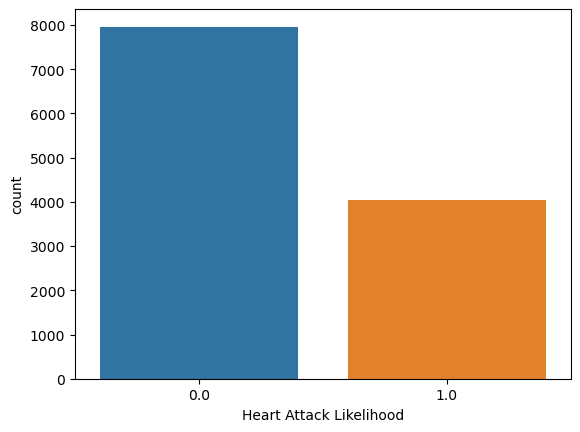

In [48]:
sns.countplot(df['Heart Attack Likelihood'])

In [49]:
df

,Age,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Stress Level,...,Region_South,Region_West,Urban/Rural_Urban,Diet Type_Vegan,Diet Type_Vegetarian,Exercise Induced Angina_Yes,Family History of Heart Disease_Yes,Diabetes_Yes,Hypertension_Yes,ECG Results_Normal
0,30,1.0,0.0,2.0,0.0,3,8,148,34.4,2.0,...,0,0,1,0,0,0,0,0,1,1
1,24,0.0,1.0,1.0,0.0,15,9,124,25.0,2.0,...,0,0,1,0,0,0,0,0,0,1
2,24,0.0,1.0,1.0,1.0,15,3,256,33.9,0.0,...,0,0,1,1,0,0,1,1,0,1
3,27,1.0,1.0,0.0,0.0,6,7,137,19.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,21,0.0,1.0,1.0,2.0,4,9,262,28.0,0.0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,30,1.0,2.0,0.0,1.0,13,9,288,17.6,0.0,...,0,0,1,0,1,0,0,1,0,1
11996,35,1.0,0.0,2.0,2.0,4,6,138,19.9,2.0,...,0,0,1,0,0,0,0,1,0,1
11997,30,1.0,0.0,0.0,1.0,3,7,173,23.9,1.0,...,0,0,1,0,0,0,0,1,1,1
11998,23,2.0,1.0,0.0,0.0,5,7,278,21.6,0.0,...,0,0,1,0,0,0,1,1,0,1


In [50]:
y_pred=model1.predict(X_test)

In [51]:
y_pred=np.array(y_pred)

# Random Forest

In [52]:
RF=RandomForestClassifier(100)
model2=RF.fit(X_train,y_train)

In [53]:
evaluate_model(model2,X_test,y_test)

🔹 Model Evaluation Metrics 🔹
✅ Accuracy: 0.8864
✅ Precision: 0.9927
✅ Recall: 0.6699
✅ F1 Score: 0.8000

🔹 Confusion Matrix:
[[2373    6]
 [ 403  818]]

🔹 Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      2379
         1.0       0.99      0.67      0.80      1221

    accuracy                           0.89      3600
   macro avg       0.92      0.83      0.86      3600
weighted avg       0.90      0.89      0.88      3600



# XGBOOST

In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model3=xgb.fit(X_train, y_train)

In [55]:
evaluate_model(model3,X_test,y_test)

🔹 Model Evaluation Metrics 🔹
✅ Accuracy: 0.8158
✅ Precision: 0.7835
✅ Recall: 0.6314
✅ F1 Score: 0.6993

🔹 Confusion Matrix:
[[2166  213]
 [ 450  771]]

🔹 Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      2379
         1.0       0.78      0.63      0.70      1221

    accuracy                           0.82      3600
   macro avg       0.81      0.77      0.78      3600
weighted avg       0.81      0.82      0.81      3600



In [20]:
class_1df=df[df['Heart Attack Likelihood']==1]

for i in range(100):
    df2=class_1df.sample(20)
    df=pd.concat([df,df2],ignore_index=True)